# 성인 인구조사 소득 예측

- age: 나이
- workclass: 고용 형태
- fnlwgt: 사람의 대표성을 나타내는 가중치(final weight)
- education: 교육 수준
- education.num: 교육 수준 수치
- marital.status: 결혼 상태
- occupation: 업종
- relationship: 가족 관계
- race: 인종
- sex: 성별
- capital.gain: 양도 소득
- capital.loss: 양도 손실
- hours.per.week: 주당 근무 시간
- native.country: 국적
- income: 수익 (예측해야 하는 값)

In [1]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/adult-census-income/adult.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048, 2), (6513, 2))

In [2]:
X_train.reset_index(drop=True)
X_test.reset_index(drop=True)
y_train.reset_index(drop=True)
y_test.reset_index(drop=True)

,id,income
0,20901,<=50K
1,14170,>50K
2,1776,>50K
3,30428,<=50K
4,8602,<=50K
...,...,...
6508,31222,<=50K
6509,10861,<=50K
6510,8929,<=50K
6511,2066,>50K


In [3]:
# 시험환경에서는 아래와 같이 제공됨
# import pandas as pd
# X_test = pd.read_csv("data/X_test.csv")
# X_train = pd.read_csv("data/X_train.csv")
# y_train = pd.read_csv("data/y_train.csv")

In [4]:
import sklearn
from sklearn import *

from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xg
from xgboost import XGBClassifier, XGBRFClassifier

# 사용자 코딩

In [5]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States
14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States
32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [6]:
X_test.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20901,58,Private,114495,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
14170,46,Private,247043,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
1776,67,Local-gov,103315,Masters,14,Never-married,Exec-managerial,Other-relative,White,Female,15831,0,72,United-States
30428,18,Private,165532,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,15,United-States
8602,26,State-gov,58039,Some-college,10,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States


In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       24592 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education.num   26048 non-null  int64 
 5   marital.status  26048 non-null  object
 6   occupation      24585 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital.gain    26048 non-null  int64 
 11  capital.loss    26048 non-null  int64 
 12  hours.per.week  26048 non-null  int64 
 13  native.country  25587 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.0+ MB


In [8]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 20901 to 25782
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             6513 non-null   int64 
 1   workclass       6133 non-null   object
 2   fnlwgt          6513 non-null   int64 
 3   education       6513 non-null   object
 4   education.num   6513 non-null   int64 
 5   marital.status  6513 non-null   object
 6   occupation      6133 non-null   object
 7   relationship    6513 non-null   object
 8   race            6513 non-null   object
 9   sex             6513 non-null   object
 10  capital.gain    6513 non-null   int64 
 11  capital.loss    6513 non-null   int64 
 12  hours.per.week  6513 non-null   int64 
 13  native.country  6391 non-null   object
dtypes: int64(6), object(8)
memory usage: 763.2+ KB


결측치 존재 변수 : workclass, occupation, native.country

In [9]:
X_train['native.country'] = X_train['native.country'].fillna(X_train['native.country'].mode()[0])
X_test['native.country'] = X_test['native.country'].fillna(X_train['native.country'].mode()[0])

X_train['workclass'] = X_train['workclass'].fillna(X_train['workclass'].mode()[0])
X_test['workclass'] = X_test['workclass'].fillna(X_train['workclass'].mode()[0])

In [10]:
for i in range(len(X_train['sex'].value_counts().index)):
    for j in range(len(X_train['education.num'].value_counts().index)):
            
            if len(X_train.loc[(X_train['sex']==X_train['sex'].value_counts().index[i])&(
                X_train['education.num']==X_train['education.num'].value_counts().index[j])&(
                X_train['occupation'].isna()),'occupation']) != 0:
                
                X_train.loc[(X_train['sex']==X_train['sex'].value_counts().index[i])&(
                    X_train['education.num']==X_train['education.num'].value_counts().index[j])&(
                    X_train['occupation'].isna()),'occupation'] = X_train.loc[(X_train['sex']==X_train['sex'].value_counts().index[i])&(
                        X_train['education.num']==X_train['education.num'].value_counts().index[j])&(
                        X_train['occupation'].notna()),'occupation'].mode()[0]

                X_test.loc[(X_test['sex']==X_train['sex'].value_counts().index[i])&(
                    X_test['education.num']==X_train['education.num'].value_counts().index[j])&(
                    X_test['occupation'].isna()),'occupation'] = X_train.loc[(X_train['sex']==X_train['sex'].value_counts().index[i])&(
                        X_train['education.num']==X_train['education.num'].value_counts().index[j])&(
                        X_train['occupation'].notna()),'occupation'].mode()[0]

In [11]:
X_train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
X_test.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,6513.000000,6.513000e+03,6513.000000,6513.000000,6513.000000,6513.000000
mean,38.466912,1.905952e+05,10.074927,1063.471211,82.609090,40.506372
std,13.689111,1.100911e+05,2.565345,7306.639179,395.962575,12.318984
min,17.000000,1.930200e+04,1.000000,0.000000,0.000000,1.000000
25%,27.000000,1.166080e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.775960e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.400270e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,3770.000000,99.000000


<AxesSubplot:>

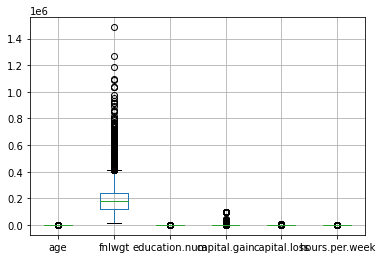

In [13]:
X_train.boxplot()

<AxesSubplot:>

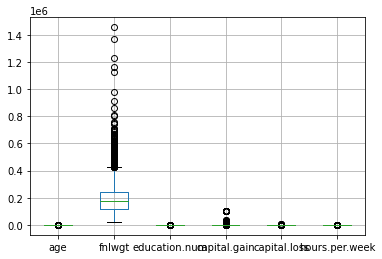

In [14]:
X_test.boxplot()

In [15]:
y_train.income.value_counts() #분류문제

<=50K    19756
>50K      6292
Name: income, dtype: int64

In [16]:
obj=[1,3,5,6,7,8,9,13]
for i in range(len(obj)):
    print(X_train.iloc[:,obj[i]].name, ':',len(X_train.iloc[:,obj[i]].value_counts().index))
    print(X_test.iloc[:,obj[i]].name, ':',len(X_test.iloc[:,obj[i]].value_counts().index))

workclass : 8
workclass : 7
education : 16
education : 16
marital.status : 7
marital.status : 7
occupation : 14
occupation : 14
relationship : 6
relationship : 6
race : 5
race : 5
sex : 2
sex : 2
native.country : 41
native.country : 40


In [17]:
obj=[8,9]
for i in range(len(obj)):
    X_train = pd.concat([X_train,pd.get_dummies(X_train.iloc[:,obj[i]]).iloc[:,:-1]],axis=1)
    X_test = pd.concat([X_test,pd.get_dummies(X_test.iloc[:,obj[i]]).iloc[:,:-1]],axis=1)

In [18]:
le = preprocessing.LabelEncoder()

obj=[1,3,5,6,7,13]
for i in range(len(obj)):
    le.fit(X_train.iloc[:,obj[i]])
    X_train.iloc[:,obj[i]]=le.transform(X_train.iloc[:,obj[i]])
    X_test.iloc[:,obj[i]]=le.transform(X_test.iloc[:,obj[i]])

In [19]:
drop=['sex','race']
for i in range(len(drop)):
    X_train.drop(drop[i], axis=1, inplace=True)
    X_test.drop(drop[i], axis=1, inplace=True)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
y_train.iloc[:,1] = pd.get_dummies(y_train.iloc[:,1]).iloc[:,0]
y_test.iloc[:,1] = pd.get_dummies(y_test.iloc[:,1]).iloc[:,0]

In [22]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
model_list = [AdaBoostClassifier(random_state=0), ExtraTreesClassifier(random_state=0), GradientBoostingClassifier(random_state=0), 
              RandomForestClassifier(random_state=0), LogisticRegression(random_state=0), KNeighborsClassifier(), 
              DecisionTreeClassifier(random_state=0), SVC(random_state=0), XGBClassifier(random_state=0), XGBRFClassifier(random_state=0)]

for i in range(len(model_list)):
    clf = model_list[i]
    clf.fit(X_tra, y_tra.iloc[:,1])
    print(model_list[i],":",roc_auc_score(y_val.iloc[:,1], clf.predict(X_val)))

AdaBoostClassifier(random_state=0) : 0.7700388997799624
ExtraTreesClassifier(random_state=0) : 0.7754486284544025
GradientBoostingClassifier(random_state=0) : 0.7763274813405913
RandomForestClassifier(random_state=0) : 0.7805701355411675
LogisticRegression(random_state=0) : 0.7015062111549457
KNeighborsClassifier() : 0.7498911568265951
DecisionTreeClassifier(random_state=0) : 0.7387032136504339
SVC(random_state=0) : 0.7499262217595544
[14:00:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) : 0.7974811622261895


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:00:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, enable_categorical=False, gamma=0,
                gpu_id=-1, importance_type=None, interaction_constraints='',
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=4,
                num_parallel_tree=100, objective='binary:logistic',
                predictor='auto', random_state=0, reg_alpha=0,
                scale_pos_weight=1, tree_method='exact', validate_parameters=1,
                verbosity=None) : 0.7476557166785847


- AdaBoostClassifier(random_state=0) : 0.7700388997799624
- ExtraTreesClassifier(random_state=0) : 0.7754486284544025
- GradientBoostingClassifier(random_state=0) : 0.7763274813405913
- RandomForestClassifier(random_state=0) : 0.7805701355411675
- XGBClassifier() : 0.7974811622261895

위의 모델 구체화

In [24]:
parameters = {'n_estimators':[100, 300, 500], 'learning_rate':[0.1,0.5,0.01,0.05]}
clf = GridSearchCV(AdaBoostClassifier(random_state=0) , parameters, scoring = 'roc_auc')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

0.922819735010451
{'learning_rate': 0.5, 'n_estimators': 500}


In [25]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(ExtraTreesClassifier(random_state=0) , parameters, scoring = 'roc_auc')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

0.9096199237367386
{'max_depth': 15, 'n_estimators': 500}


In [26]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(GradientBoostingClassifier(random_state=0) , parameters, scoring = 'roc_auc')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

0.9263720676567864
{'max_depth': 5, 'n_estimators': 100}


In [27]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(RandomForestClassifier(random_state=0) , parameters, scoring = 'roc_auc')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

0.9174281649637205
{'max_depth': 15, 'n_estimators': 500}


In [28]:
parameters = {'n_estimators':[100, 300, 500], 'max_depth':[5, 10, 15]}
clf = GridSearchCV(XGBClassifier(random_state=0) , parameters, scoring = 'roc_auc')
clf.fit(X_train, y_train.iloc[:,1])
print(clf.best_score_)
print(clf.best_params_)

[14:40:46] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:52] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:40:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:02] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:22] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:42] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:53] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:55] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:41:58] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:11] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:34] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:42:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:06] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:19] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:48] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:43:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:14] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:25] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:47] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:44:57] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:16] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:33] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:51] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:09] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:46:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9266258743702185
{'max_depth': 5, 'n_estimators': 100}


In [30]:
clf = XGBClassifier(random_state=0, max_depth= 5, n_estimators= 100)
clf.fit(X_train, y_train.iloc[:,1])
pred = y_test.copy()
pred.iloc[:,1] = clf.predict(X_test)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:50:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


최종모델

In [31]:
roc_auc_score(y_test.iloc[:,1], pred.iloc[:,1])

0.7988645425891467

In [32]:
accuracy_score(y_test.iloc[:,1], pred.iloc[:,1])

0.8734838016275142

In [ ]:
#pred.to_csv('11111.csv')

In [33]:
# 시험환경 세팅 (코드 변경 X)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def exam_data_load(df, target, id_name="", null_name=""):
    if id_name == "":
        df = df.reset_index().rename(columns={"index": "id"})
        id_name = 'id'
    else:
        id_name = id_name
    
    if null_name != "":
        df[df == null_name] = np.nan
    
    X_train, X_test = train_test_split(df, test_size=0.2, shuffle=True, random_state=2021)
    y_train = X_train[[id_name, target]]
    X_train = X_train.drop(columns=[id_name, target])
    y_test = X_test[[id_name, target]]
    X_test = X_test.drop(columns=[id_name, target])
    return X_train, X_test, y_train, y_test 
    
df = pd.read_csv("../input/adult-census-income/adult.csv")
X_train, X_test, y_train, y_test = exam_data_load(df, target='income', null_name='?')

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048, 2), (6513, 2))

## 라이브러리 불러오기

In [34]:
import pandas as pd
import numpy as np

## 데이터 불러오기(생략)

## EDA

In [35]:
# 데이터 크기 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26048, 14), (6513, 14), (26048, 2), (6513, 2))

In [36]:
# 데이터 확인
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,36,Private,241998,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States
7632,53,Private,103950,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States
27878,19,Private,203061,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,25,United-States
14121,20,Private,102607,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States
32345,54,State-gov,138852,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States


In [37]:
# 타겟 수 확인
y_train['income'].value_counts()

<=50K    19756
>50K      6292
Name: income, dtype: int64

In [38]:
# type확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26048 entries, 21851 to 25716
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26048 non-null  int64 
 1   workclass       24592 non-null  object
 2   fnlwgt          26048 non-null  int64 
 3   education       26048 non-null  object
 4   education.num   26048 non-null  int64 
 5   marital.status  26048 non-null  object
 6   occupation      24585 non-null  object
 7   relationship    26048 non-null  object
 8   race            26048 non-null  object
 9   sex             26048 non-null  object
 10  capital.gain    26048 non-null  int64 
 11  capital.loss    26048 non-null  int64 
 12  hours.per.week  26048 non-null  int64 
 13  native.country  25587 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.0+ MB


In [39]:
# 피처 구분
# Numeric features
numeric_features = [
                    'age',
                    'fnlwgt', 
                    'education.num',
                    'capital.gain', 
                    'capital.loss', 
                    'hours.per.week',                     
                   ]

# Categorical features
cat_features = [
                 'workclass',              
                 'education',            
                 'marital.status', 
                 'occupation', 
                 'relationship', 
                 'race', 
                 'sex',
                 'native.country'
]

In [40]:
X_train[numeric_features].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.610335,1.895741e+05,10.082118,1081.193796,88.477695,40.420224
std,13.628346,1.043848e+05,2.574608,7404.962675,404.689981,12.354707
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.182472e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785755e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.365968e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [41]:
X_train[cat_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,24592,26048,26048,24585,26048,26048,26048,25587
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
freq,18160,8408,11987,3323,10558,22270,17400,23381


## 결측치 처리

In [42]:
X_train.isnull().sum()

age                  0
workclass         1456
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1463
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     461
dtype: int64

In [43]:
X_test.isnull().sum()

age                 0
workclass         380
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        380
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    122
dtype: int64

In [44]:
X_train['workclass'].value_counts()

Private             18160
Self-emp-not-inc     2049
Local-gov            1648
State-gov            1037
Self-emp-inc          909
Federal-gov           770
Without-pay            12
Never-worked            7
Name: workclass, dtype: int64

In [45]:
X_train['occupation'].value_counts()

Exec-managerial      3323
Prof-specialty       3306
Craft-repair         3296
Adm-clerical         3037
Sales                2898
Other-service        2624
Machine-op-inspct    1584
Transport-moving     1257
Handlers-cleaners    1080
Farming-fishing       786
Tech-support          746
Protective-serv       521
Priv-house-serv       119
Armed-Forces            8
Name: occupation, dtype: int64

In [46]:
X_train['native.country'].value_counts()

United-States                 23381
Mexico                          516
Philippines                     158
Germany                         108
Canada                           88
Puerto-Rico                      87
El-Salvador                      76
India                            73
Cuba                             73
England                          69
Italy                            63
South                            62
Jamaica                          59
Vietnam                          57
China                            57
Guatemala                        54
Dominican-Republic               51
Japan                            49
Poland                           47
Columbia                         44
Taiwan                           37
Haiti                            37
Iran                             34
Portugal                         32
Peru                             29
Nicaragua                        27
Ecuador                          25
Greece                      

- 결측치는 최빈값과 차이가 크면 최빈값으로 값이 비슷하면 별도의 값으로 대체함

In [47]:
def data_fillna(df):
    df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
    df['occupation'] = df['occupation'].fillna("null")
    df['native.country'] = df["native.country"].fillna(df['native.country'].mode()[0])
    return df

X_train = data_fillna(X_train)
X_test = data_fillna(X_test)

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

## 피처엔지니어링

In [48]:
# 라벨인코딩
from sklearn.preprocessing import LabelEncoder

all_df = pd.concat([X_train.assign(ind="train"), X_test.assign(ind="test")])
le = LabelEncoder()
all_df[cat_features] = all_df[cat_features].apply(le.fit_transform)

X_train = all_df[all_df['ind'] == 'train']
X_train = X_train.drop('ind',axis=1)
X_train

X_test = all_df[all_df['ind'] == 'test']
X_test = X_test.drop('ind',axis=1)
X_test

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
20901,58,3,114495,11,9,2,3,0,4,1,0,0,40,38
14170,46,3,247043,11,9,2,13,0,4,1,0,0,40,38
1776,67,1,103315,12,14,4,3,2,4,0,15831,0,72,38
30428,18,3,165532,15,10,4,11,3,4,1,0,0,15,38
8602,26,6,58039,15,10,2,7,0,4,1,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31222,22,3,199426,15,10,4,14,1,4,0,0,0,40,38
10861,41,3,155106,11,9,2,5,0,4,1,0,0,40,38
8929,32,3,153078,9,13,4,7,1,1,1,0,0,40,34
2066,48,6,171926,14,15,2,9,0,4,1,15024,0,50,38


In [49]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
X_train

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
21851,0.260274,3,0.156011,9,0.800000,2,2,0,4,1,0.000000,0.0,0.500000,38
7632,0.493151,3,0.062255,12,0.866667,0,9,1,4,0,0.000000,0.0,0.397959,38
27878,0.027397,3,0.129566,15,0.600000,4,12,1,4,0,0.000000,0.0,0.244898,38
14121,0.041096,3,0.061343,11,0.533333,4,5,3,4,1,0.000000,0.0,0.295918,38
32345,0.506849,6,0.085958,11,0.533333,2,9,0,4,1,0.000000,0.0,0.397959,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2669,0.383562,3,0.118910,12,0.866667,0,3,4,4,1,0.074301,0.0,0.704082,38
17536,0.260274,3,0.110039,1,0.400000,0,13,1,4,1,0.000000,0.0,0.397959,38
6201,0.410959,3,0.178669,7,0.733333,6,7,3,4,0,0.000000,0.0,0.346939,38
27989,0.452055,5,0.125113,10,1.000000,2,9,0,4,1,0.000000,0.0,0.224490,38


In [50]:
# target값 변경
y = (y_train['income'] != '<=50K').astype(int)
y[:5]

21851    1
7632     0
27878    0
14121    0
32345    0
Name: income, dtype: int64

## 검증용 데이터 분리

In [51]:
# 학습용 데이터와 검증용 데이터로 구분
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y, test_size=0.15, random_state=2021)
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((22140, 14), (3908, 14), (22140,), (3908,))

## 모델 & 평가

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8119242579324463


In [53]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 2022)
model.fit(X_tr, y_tr)
pred = model.predict(X_val)
print('accuracy score:', (accuracy_score(y_val, pred)))

accuracy score: 0.8480040941658137


## 채점 (수험자는 확인 불가)

In [54]:
y_test = (y_test['income'] != '<=50K').astype(int)
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print('accuracy score:', (accuracy_score(y_test, pred)))

accuracy score: 0.8569015814524796
